In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import itertools

os.chdir(r"/content/drive/MyDrive/machine learning final project")

all_file_name = os.listdir(r"/content/drive/MyDrive/machine learning final project/original data")


## bug too fix
def load_data(file_name):
    df = pd.read_csv(r"/content/drive/MyDrive/machine learning final project/original data/{}/eeg.csv".format(file_name))

    # because:there is duplicate data
    df = df[::2]
    
    # element to plot grpah
    time_step = df["id"]
    sensor_1 = df["ch1"]
    sensor_2 = df["ch2"]
    sensor_3 = df["ch3"]
    sensor_4 = df["ch4"]
    sensor_5 = df["ch5"]

    return time_step,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5

# load data for feature concentration
path = r"/content/drive/MyDrive/machine learning final project/final data"
all_process_name = os.listdir(path)

def load_data_process(path,file_name):
    df = pd.read_csv(path+r"\{}".format(file_name))

    # because:there is duplicate data
    
    # element to plot grpah
    time_step = df["id"]
    sensor_1 = df["ch1"]
    sensor_2 = df["ch2"]
    sensor_3 = df["ch3"]
    sensor_4 = df["ch4"]
    sensor_5 = df["ch5"]

    return time_step,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5

def auto_sublpot(time_step,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,name):
# Creating 2 subplots
    fig, ax = plt.subplots(5)
    
    # add title on top
    fig.suptitle(name)
    
    # Accessing each axes object to plot the data through returned array
    ax[0].plot(time_step,sensor_1,color="orange")
    ax[1].plot(time_step,sensor_2,color="green")
    ax[2].plot(time_step,sensor_3,color="blue")
    ax[3].plot(time_step,sensor_4,color="black")
    ax[4].plot(time_step,sensor_5,color="magenta")
    plt.show()

# add ten timestep to one (concertration)
# does not step 2 ,because data processed
def feature_concentration(data):
    previous = 0
    ten_to_one = []
    for current in range(10,len(data),10):
        add_up = sum(data[previous:current])
        ten_to_one.append(add_up)
        previous = current
    
    return list(ten_to_one)

# write to csv
def create_csv(name,time_step,fc_sensor_1,fc_sensor_2,fc_sensor_3,fc_sensor_4,fc_sensor_5):
    with open(r"/content/drive/MyDrive/machine learning final project\final data\{}.csv".format(name),"w", newline='') as f:  
        cw = csv.writer(f)
        cw.writerow(["id","ch1","ch2","ch3","ch4","ch5"])
        for i in range(len(fc_sensor_1)):
            cw.writerow([i,fc_sensor_1[i],fc_sensor_2[i],fc_sensor_3[i],fc_sensor_4[i],fc_sensor_5[i]])

# chinese song and japan song
# use with all_process_name
# id is not needed
def data_window(path , name ,len_window):
    df = pd.read_csv(path+"/"+name,usecols=[1,2,3,4,5])

    # store process data
    content = []
    previous = 0
    
    # can ignore padding problem
    for current in range(len_window , len(df["ch1"]) , len_window):
    #for current in range(5,10,5):
        tem = df[previous:current]
        transposed = np.array(tem).T.tolist()
        flat_ls = list(itertools.chain(*transposed))
        content.append(flat_ls)
        previous = current
        
    return content

# for lstm
def data_window_2(path , name ):
    df = pd.read_csv(path+"/"+name,usecols=[1,2,3,4,5])
    df = df.T
    df = (df.values.tolist())

    output = []
    previous = 0
    for current in range(5,len(df[0]),5):
        first_column = df[0][previous:current]
        second_column = df[1][previous:current]
        thrid_column = df[2][previous:current]
        four_column = df[3][previous:current]
        five_column = df[4][previous:current]
    
        output.append([first_column,second_column,thrid_column,four_column,five_column])
        previous = current
    
    # change type
    output = np.array(output)
    # fix the reshape
    output = output.reshape(int(current/5),5,5)
    
    return output

# train model
def model_train_test(model):
    model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))
    y_pred = model.predict(pd.DataFrame(x_test))
    print(accuracy_score(pd.DataFrame(y_test), pd.DataFrame(y_pred)))
    print(classification_report(pd.DataFrame(y_test),pd.DataFrame(y_pred)))
    plot_confusion_matrix(model,pd.DataFrame(x_test),pd.DataFrame(y_test))

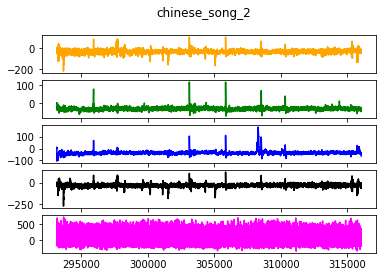

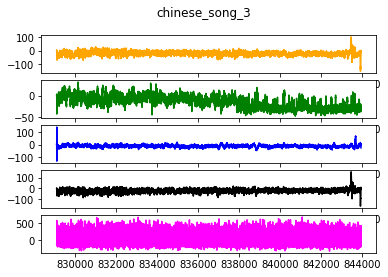

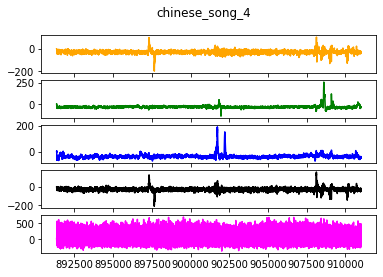

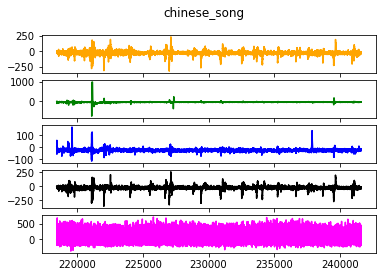

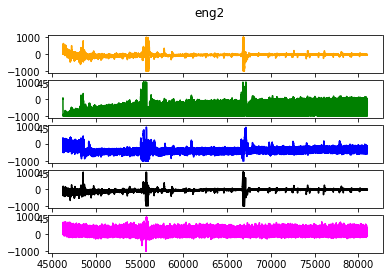

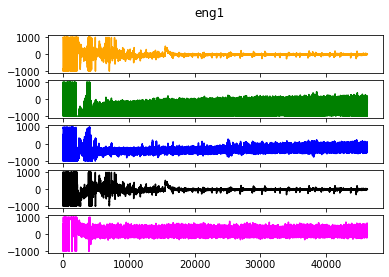

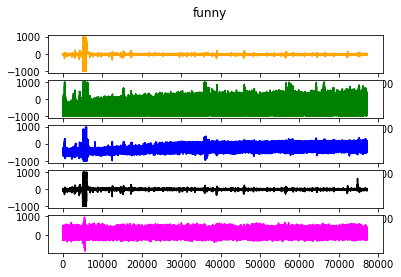

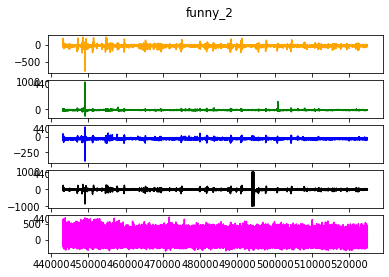

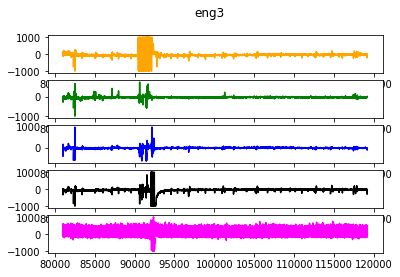

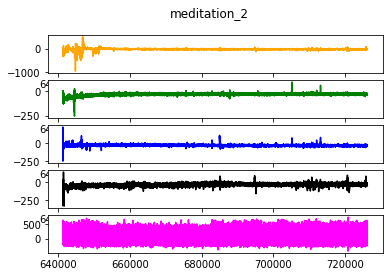

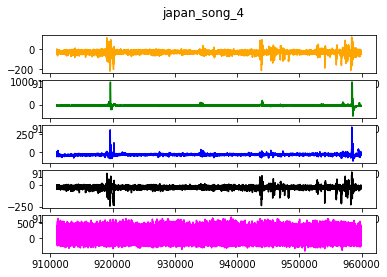

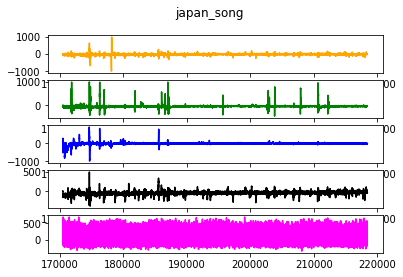

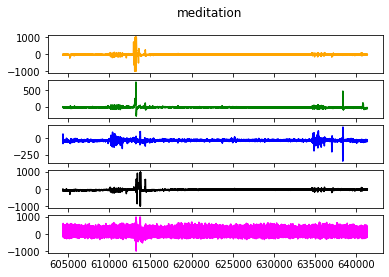

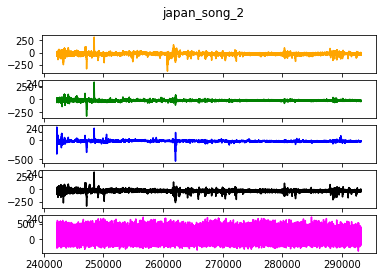

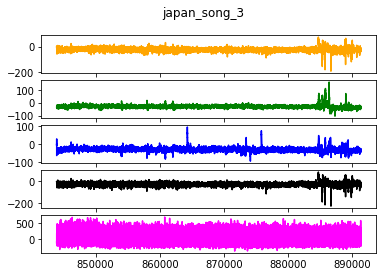

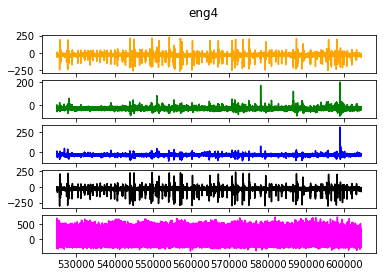

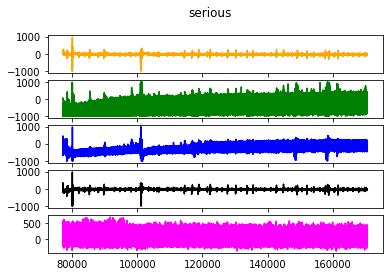

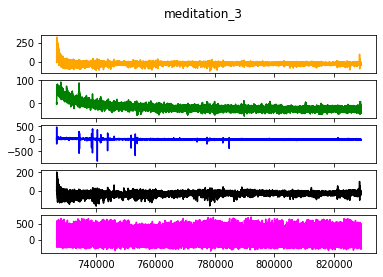

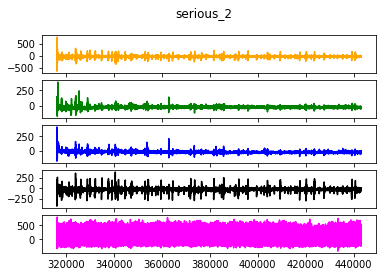

In [7]:
for name in all_file_name:
    time_step,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5 = load_data(name)
    auto_sublpot(time_step,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,name)
    
    # feature enginerring
    fc_sensor_1 = feature_concentration(sensor_1)
    fc_sensor_2 = feature_concentration(sensor_2)
    fc_sensor_3 = feature_concentration(sensor_3)
    fc_sensor_4 = feature_concentration(sensor_4)
    fc_sensor_5 = feature_concentration(sensor_5)

    # write to csv
 #  create_csv(name,time_step,fc_sensor_1,fc_sensor_2,fc_sensor_3,fc_sensor_4,fc_sensor_5)

In [12]:

data = []
label = []
for name in all_process_name:
    print(name)
    new_data = data_window(path , name ,10)
    if name.startswith("c") == True:
        new_label = [0 for i in range(len(new_data))]
    if name.startswith("j") == True:
        new_label = [1 for i in range(len(new_data))]
    
    data.extend(new_data)
    label.extend(new_label)

chinese_song.csv
chinese_song_2.csv
chinese_song_3.csv
chinese_song_4.csv
japan_song.csv
japan_song_2.csv
japan_song_3.csv
japan_song_4.csv


In [13]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM ,Dropout

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [14]:
# data for lstm
pre_data = [] 
label_2 = []
for name in all_process_name:
    new_data = data_window_2(path , name)
    if name.startswith("c") == True:
        new_label = [0 for i in range(len(new_data))]
    if name.startswith("j") == True:
        new_label = [1 for i in range(len(new_data))]
    
    pre_data.extend(new_data)
    label_2.extend(new_label)

x_train,x_test,y_train,y_test = train_test_split( np.array(pre_data) ,np.array(label_2) ,test_size = 0.3)


In [15]:
# fail not same dim

model = Sequential()
model.add(LSTM(64, input_shape=(5, 5)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mse', optimizer="adam")
model.fit(x_train, y_train, epochs=10 ,batch_size=1, validation_data=(x_test,y_test))
#model.summary()

test_preds = model.predict(x_test) 
print(accuracy_score(y_test, test_preds))

Epoch 1/10
3857/3857 [==============================] - 18s 4ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 2/10
3857/3857 [==============================] - 14s 4ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 3/10
3857/3857 [==============================] - 13s 3ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 4/10
3857/3857 [==============================] - 13s 3ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 5/10
3857/3857 [==============================] - 13s 3ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 6/10
3857/3857 [==============================] - 13s 3ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 7/10
3857/3857 [==============================] - 14s 4ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 8/10
3857/3857 [==============================] - 14s 4ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 9/10
3857/3857 [==============================] - 14s 4ms/step - loss: 0.2925 - val_loss: 0.2902
Epoch 10/10
52/52 [==============================] - 1s 3ms/step


ValueError: ignored

In [16]:
#for machine learning
x_train,x_test,y_train,y_test = train_test_split( data ,label ,test_size = 0.3)

0.6844014510278114
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       245
           1       0.77      0.78      0.78       582

    accuracy                           0.68       827
   macro avg       0.62      0.62      0.62       827
weighted avg       0.68      0.68      0.68       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


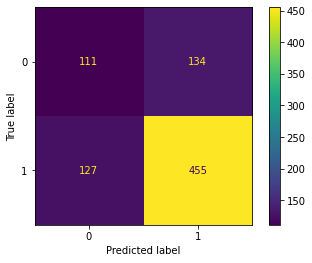

In [17]:
decision_tree = DecisionTreeClassifier(random_state=0)
model_train_test(decision_tree)

<ipython-input-11-8d3678e7bb74>:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))


0.7750906892382105
              precision    recall  f1-score   support

           0       0.83      0.30      0.44       245
           1       0.77      0.97      0.86       582

    accuracy                           0.78       827
   macro avg       0.80      0.64      0.65       827
weighted avg       0.79      0.78      0.74       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


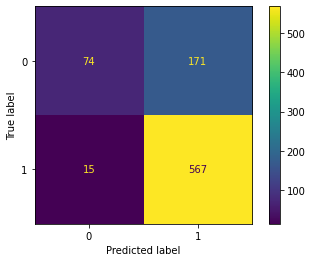

In [18]:
random_forest = RandomForestClassifier(max_depth=100, random_state=0)
model_train_test(random_forest)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.781136638452237
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       245
           1       0.79      0.94      0.86       582

    accuracy                           0.78       827
   macro avg       0.77      0.67      0.69       827
weighted avg       0.78      0.78      0.76       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


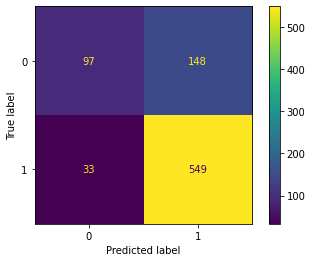

In [19]:
xgboost = XGBClassifier(eta=0.3 ,max_depth=16)
model_train_test(xgboost)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the

0.6916565900846433
              precision    recall  f1-score   support

           0       0.43      0.13      0.20       245
           1       0.72      0.93      0.81       582

    accuracy                           0.69       827
   macro avg       0.57      0.53      0.50       827
weighted avg       0.63      0.69      0.63       827



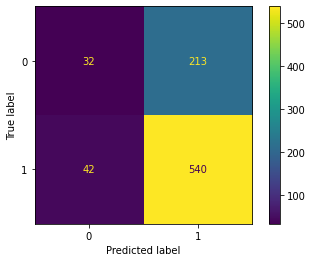

In [20]:
logistregression = LogisticRegression()
model_train_test(logistregression)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7303506650544136
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       245
           1       0.80      0.83      0.81       582

    accuracy                           0.73       827
   macro avg       0.67      0.66      0.67       827
weighted avg       0.72      0.73      0.73       827



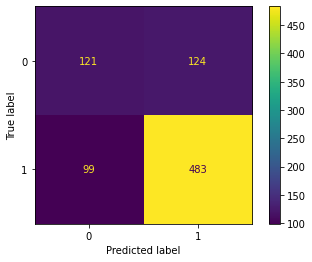

In [21]:
knclassification = KNeighborsClassifier(n_neighbors=3)
model_train_test(knclassification)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7182587666263603
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       245
           1       0.71      1.00      0.83       582

    accuracy                           0.72       827
   macro avg       0.86      0.52      0.46       827
weighted avg       0.80      0.72      0.61       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


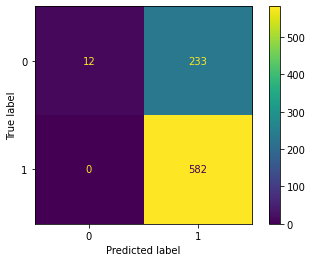

In [22]:
svm_clf = svm.SVC()
model_train_test(svm_clf)

In [23]:
# 資料正規化

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


0.6844014510278114
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       245
           1       0.77      0.78      0.78       582

    accuracy                           0.68       827
   macro avg       0.62      0.62      0.62       827
weighted avg       0.68      0.68      0.68       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


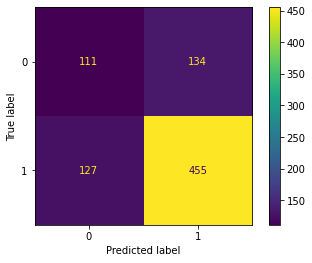

In [24]:
decision_tree = DecisionTreeClassifier(random_state=0)
model_train_test(decision_tree)

<ipython-input-11-8d3678e7bb74>:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))


0.7750906892382105
              precision    recall  f1-score   support

           0       0.83      0.30      0.44       245
           1       0.77      0.97      0.86       582

    accuracy                           0.78       827
   macro avg       0.80      0.64      0.65       827
weighted avg       0.79      0.78      0.74       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


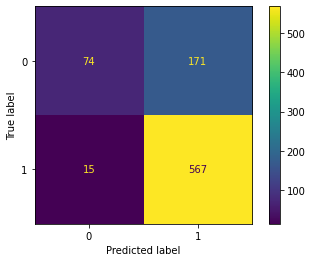

In [25]:
random_forest = RandomForestClassifier(max_depth=100, random_state=0)
model_train_test(random_forest)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7799274486094316
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       245
           1       0.79      0.94      0.86       582

    accuracy                           0.78       827
   macro avg       0.77      0.67      0.69       827
weighted avg       0.77      0.78      0.76       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


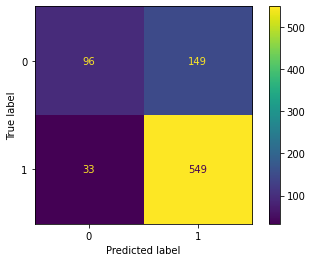

In [26]:
xgboost = XGBClassifier(eta=0.3 ,max_depth=16)
model_train_test(xgboost)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.694074969770254
              precision    recall  f1-score   support

           0       0.42      0.09      0.15       245
           1       0.71      0.95      0.81       582

    accuracy                           0.69       827
   macro avg       0.57      0.52      0.48       827
weighted avg       0.63      0.69      0.62       827



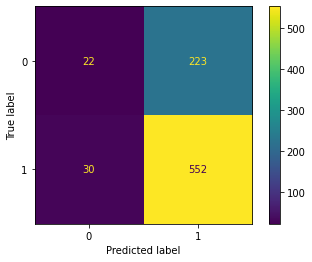

In [27]:
logistregression = LogisticRegression()
model_train_test(logistregression)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7460701330108828
              precision    recall  f1-score   support

           0       0.58      0.51      0.55       245
           1       0.80      0.84      0.82       582

    accuracy                           0.75       827
   macro avg       0.69      0.68      0.68       827
weighted avg       0.74      0.75      0.74       827



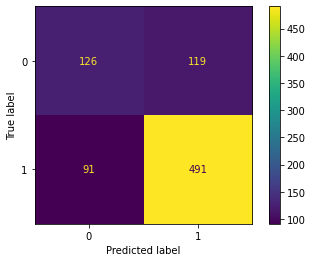

In [28]:
knclassification = KNeighborsClassifier(n_neighbors=3)
model_train_test(knclassification)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7255139056831923
              precision    recall  f1-score   support

           0       0.95      0.08      0.14       245
           1       0.72      1.00      0.84       582

    accuracy                           0.73       827
   macro avg       0.83      0.54      0.49       827
weighted avg       0.79      0.73      0.63       827



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


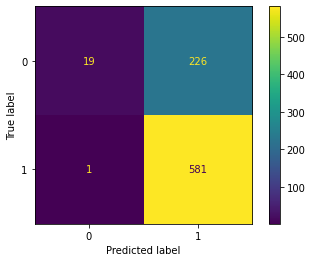

In [29]:
svm_clf = svm.SVC()
model_train_test(svm_clf)